In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hr.csv')
data

,Age,Salary,Department,Experience,Satisfaction,Gender
0,56.0,31920.0,HR,22.0,1,Female
1,NaN,NaN,Marketing,15.0,1,Female
2,NaN,NaN,Engineering,5.0,4,Male
3,32.0,106872.0,HR,NaN,5,Male
4,60.0,111132.0,HR,1.0,1,Female
...,...,...,...,...,...,...
4995,24.0,95149.0,Marketing,20.0,2,Male
4996,66.0,51058.0,Engineering,29.0,5,Male
4997,26.0,145229.0,HR,24.0,4,Male
4998,53.0,NaN,Engineering,9.0,5,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4000 non-null   float64
 1   Salary        4000 non-null   float64
 2   Department    5000 non-null   object 
 3   Experience    4000 non-null   float64
 4   Satisfaction  5000 non-null   int64  
 5   Gender        5000 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 234.5+ KB


In [4]:
data[['Age','Salary','Experience']].describe()

,Age,Salary,Experience
count,4000.000000,4000.000000,4000.00000
mean,43.642250,90174.684000,15.18175
std,14.879419,34872.037632,8.19155
min,18.000000,30066.000000,1.00000
25%,31.000000,59435.750000,8.00000
50%,43.000000,90653.000000,15.00000
75%,56.000000,120373.000000,22.00000
max,69.000000,149999.000000,29.00000


# Eksik Dataları Doldurmak

In [5]:
missingDataRatio = data.isnull().mean()
columnsToFill = missingDataRatio[missingDataRatio < 0.5].index
data[columnsToFill] = data[columnsToFill].fillna(data[columnsToFill].mean())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5000 non-null   float64
 1   Salary        5000 non-null   float64
 2   Department    5000 non-null   object 
 3   Experience    5000 non-null   float64
 4   Satisfaction  5000 non-null   int64  
 5   Gender        5000 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 234.5+ KB


# Basit Bir Veri Mühendisliği

In [7]:
data.head(3)

,Age,Salary,Department,Experience,Satisfaction,Gender
0,56.00000,31920.000,HR,22.0,1,Female
1,43.64225,90174.684,Marketing,15.0,1,Female
2,43.64225,90174.684,Engineering,5.0,4,Male


In [8]:
data['IncomePerExperience'] = round(data['Salary'] / data['Experience'])

In [9]:
data['IncomePerExperience'] = data['IncomePerExperience'].astype('int64',)

In [10]:
data['IncomePerExperience']

0         1451
1         6012
2        18035
3         7040
4       111132
         ...  
4995      4757
4996      1761
4997      6051
4998     10019
4999     57086
Name: IncomePerExperience, Length: 5000, dtype: int64

# Feature Selection --> Özellik Seçimi

In [11]:
corrMatrix = data.corr().abs()
corrMatrix.shape

(5, 5)

In [12]:
upperTri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k = 1).astype(bool))
upperTri

,Age,Salary,Experience,Satisfaction,IncomePerExperience
Age,NaN,0.014806,0.011908,0.010197,0.004786
Salary,NaN,NaN,0.011978,0.008549,0.236186
Experience,NaN,NaN,NaN,0.020018,0.587235
Satisfaction,NaN,NaN,NaN,NaN,0.016433
IncomePerExperience,NaN,NaN,NaN,NaN,NaN


In [13]:
toDrop = [column for column in upperTri.columns if any(upperTri[column] > 0.55)]
toDrop

['IncomePerExperience']

In [14]:
data.drop(columns = toDrop, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5000 non-null   float64
 1   Salary        5000 non-null   float64
 2   Department    5000 non-null   object 
 3   Experience    5000 non-null   float64
 4   Satisfaction  5000 non-null   int64  
 5   Gender        5000 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 234.5+ KB


# Histogram Grafiği Oluşturma

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Satisfaction'}>]], dtype=object)

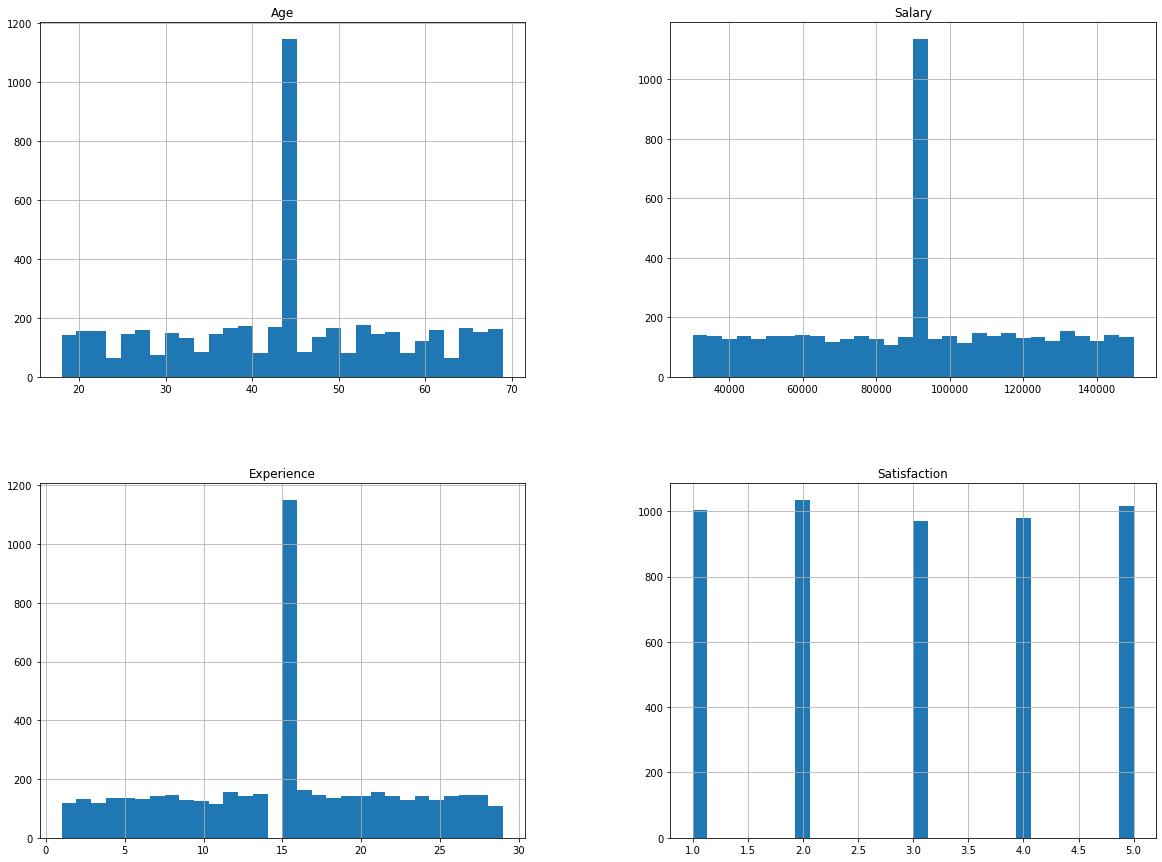

In [16]:
data.hist(bins = 30, figsize=(20,15))

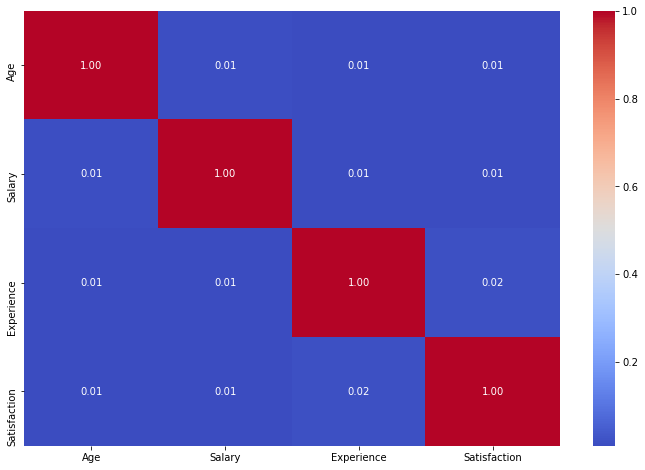

In [17]:
corrMatrix = data.corr().abs()
plt.figure(figsize =(12,8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

# Kategorik ve  Numeric Verilerin Dağılımı 

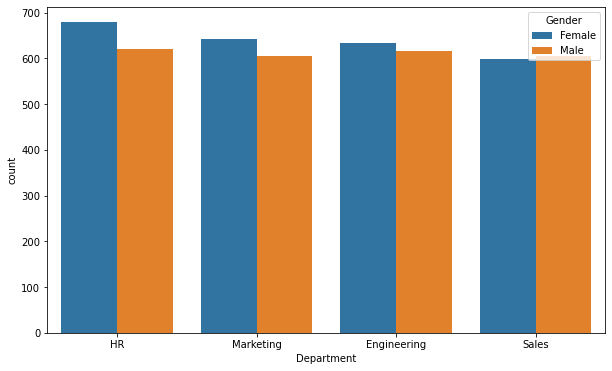

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue= 'Gender', data = data)
plt.show()

In [24]:
data['Age'] = data['Age'].astype('int64')

In [43]:
ageSalary = data.groupby('Age')['Salary'].mean().sort_values(ascending=False)


<AxesSubplot:xlabel='Age'>

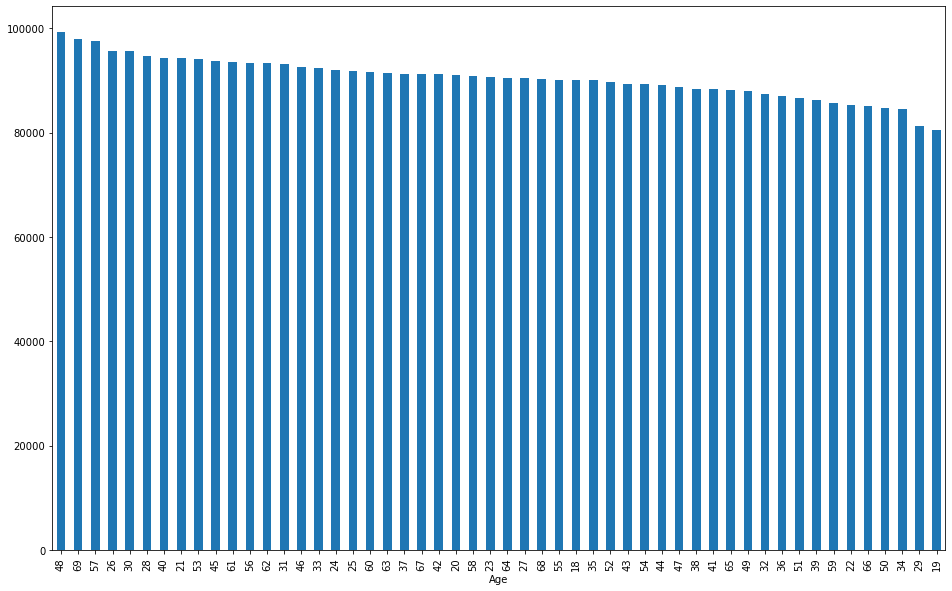

In [44]:
ageSalary.plot(x = 'Age', kind='bar', figsize=(16,10))

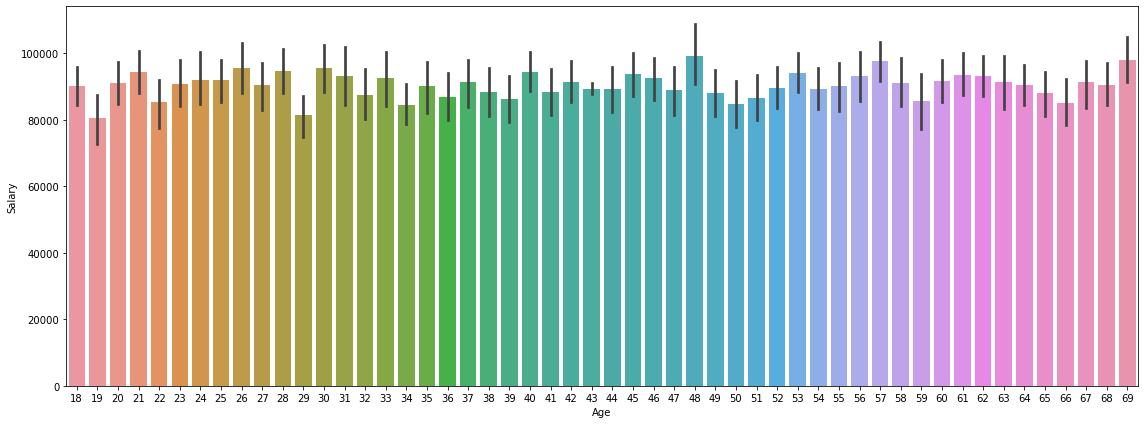

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(x = 'Age', y='Salary', data = data)
plt.tight_layout()
plt.show()

In [23]:
data['Age']

0       56.00000
1       43.64225
2       43.64225
3       32.00000
4       60.00000
          ...   
4995    24.00000
4996    66.00000
4997    26.00000
4998    53.00000
4999    36.00000
Name: Age, Length: 5000, dtype: float64